In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from LinearRegressionClass import Linear, NormalEquation
import re
# from sklearn.datasets import fetch_california_housing, fetch_species_distributions

sns.set_style('darkgrid')

# dataset = fetch_california_housing(as_frame=True)
# dataset2 = fetch_species_distributions()
# df = dataset.frame

# import pickle

# with open("CR7.pkl","rb") as inp:
#     LineaRecta = pickle.load(inp)
# LineaRecta.w

In [2]:
dataset = pd.read_csv("Highest Holywood Grossing Movies.csv", 
                      usecols=['Title', 'Movie Info', 'Distributor', 'Release Date',
                               'Domestic Sales (in $)', 'International Sales (in $)',
                               'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'])
df = dataset.copy()
del dataset

In [3]:
df.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License'],
      dtype='object')

In [4]:
df.head()

Title  \
0  Star Wars: Episode VII - The Force Awakens (2015)   
1                           Avengers: Endgame (2019)   
2                                      Avatar (2009)   
3                               Black Panther (2018)   
4                      Avengers: Infinity War (2018)   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor       Release Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Disney Studios Motion Pictures                NaN   
4  Walt Disney Studios Motion Pictures                NaN   

   Domestic Sales (in $)  International Sales (in $)  World Sales (in $)  \
0              936662225                  1132859475          2069521700   
1              858373000                  1939128328          2797501328   
2              760507625                  2086738578          2847246203   
3              700426566                   647171407          1347597973   
4              678815482                  1369544272          2048359754   

                                          Genre Movie Runtime License  
0             ['Action', 'Adventure', 'Sci-Fi']   2 hr 18 min   PG-13  
1    ['Action', 'Adventure', 'Drama', 'Sci-Fi']    3 hr 1 min   PG-13  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13  
3             ['Action', 'Adventure', 'Sci-Fi']   2 hr 14 min     NaN  
4             ['Action', 'Adventure', 'Sci-Fi']   2 hr 29 min     NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Release Date                800 non-null    object
 4   Domestic Sales (in $)       918 non-null    int64 
 5   International Sales (in $)  918 non-null    int64 
 6   World Sales (in $)          918 non-null    int64 
 7   Genre                       918 non-null    object
 8   Movie Runtime               918 non-null    object
 9   License                     744 non-null    object
dtypes: int64(3), object(7)
memory usage: 71.8+ KB


In [6]:
df.describe().T

count          mean           std         min  \
Domestic Sales (in $)       918.0  1.677469e+08  1.040360e+08  80360843.0   
International Sales (in $)  918.0  2.301434e+08  2.176011e+08       260.0   
World Sales (in $)          918.0  3.968668e+08  3.082629e+08  81600000.0   

                                     25%          50%          75%  \
Domestic Sales (in $)       1.016071e+08  132135096.0  191390485.5   
International Sales (in $)  8.845620e+07  163881928.0  288557651.0   
World Sales (in $)          2.005564e+08  301941607.0  475071823.5   

                                     max  
Domestic Sales (in $)       9.366622e+08  
International Sales (in $)  2.086739e+09  
World Sales (in $)          2.847246e+09

In [7]:
df.iloc[[df['International Sales (in $)'].argmax()]]
# df[df['International Sales (in $)'] == df['International Sales (in $)'].max()]

Title                                         Movie Info  \
2  Avatar (2009)  A paraplegic Marine dispatched to the moon Pan...   

             Distributor       Release Date  Domestic Sales (in $)  \
2  Twentieth Century Fox  December 16, 2009              760507625   

   International Sales (in $)  World Sales (in $)  \
2                  2086738578          2847246203   

                                          Genre Movie Runtime License  
2  ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']   2 hr 42 min   PG-13

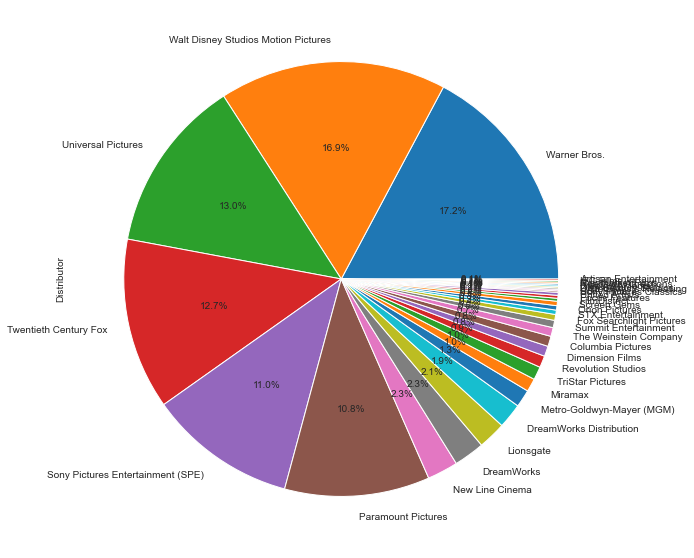

In [8]:
plt.figure(figsize=(12,10))
df['Distributor'].value_counts().plot(kind='pie', autopct='%1.1f%%');

In [9]:
genres = []
for idx,row in df['Genre'].iteritems():
    genres.append(row.strip('][').replace("'", "").split(', '))
df['Genre'] = genres

In [10]:
adventure = []
actions = []
comedy = []
for idx,row in df['Genre'].iteritems():
    if 'Adventure' in row:
        adventure.append(1)
    else: 
        adventure.append(0)
        
    if 'Action' in row:
        actions.append(1)
    else: 
        actions.append(0)
        
    if 'Comedy' in row:
        comedy.append(1)
    else: 
        comedy.append(0)

In [11]:
df['Adventure'] = adventure
df['Action'] = actions
df['Comedy'] = comedy

In [12]:
avg = []
max_ = []
for genre in ['Adventure','Action','Comedy']:
    avg.append(df[df[genre]==1]['International Sales (in $)'].mean())
    max_.append(df[df[genre]==1]['International Sales (in $)'].max())

In [14]:
avg

[325567916.4143519, 284800862.1792929, 179189150.78446114]

In [15]:
df.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License', 'Adventure',
       'Action', 'Comedy'],
      dtype='object')

In [16]:
df['Domestic Sales (in $)'] = df['Domestic Sales (in $)']/100000000
df['International Sales (in $)'] = df['International Sales (in $)']/100000000
df['World Sales (in $)'] = df['World Sales (in $)']/100000000

In [22]:
df.shape

(918, 13)

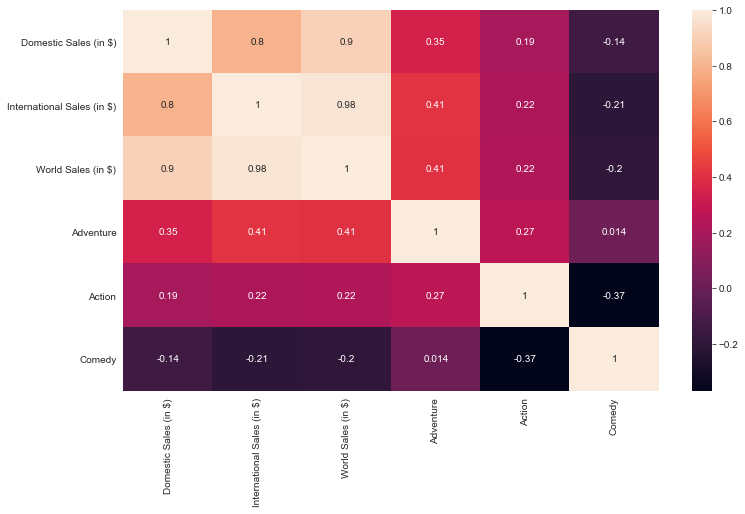

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True);

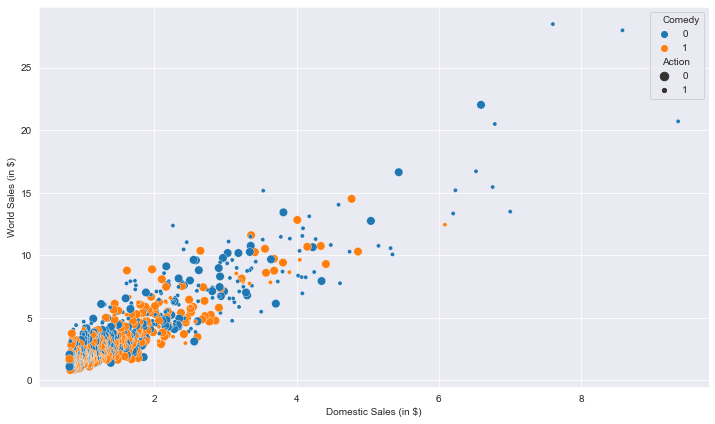

In [36]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df, x='Domestic Sales (in $)', y='World Sales (in $)', size='Action', hue='Comedy');

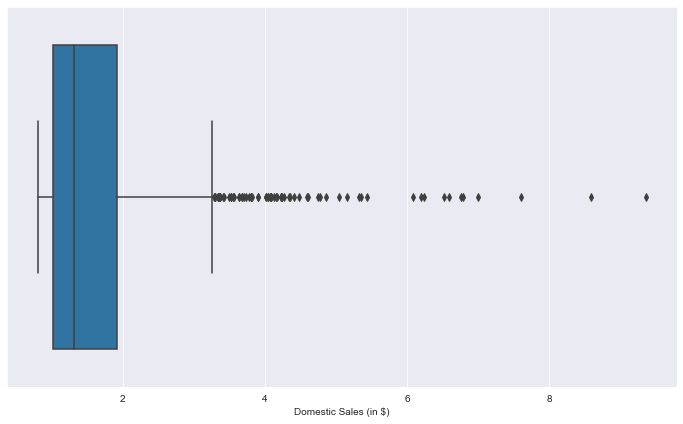

In [51]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='Domestic Sales (in $)');

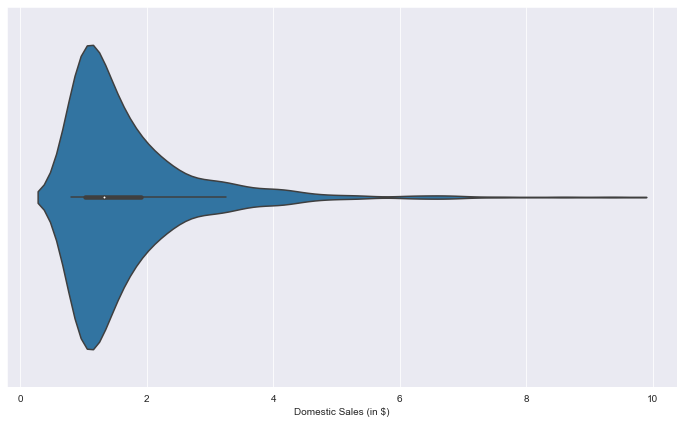

In [47]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df, x='Domestic Sales (in $)');

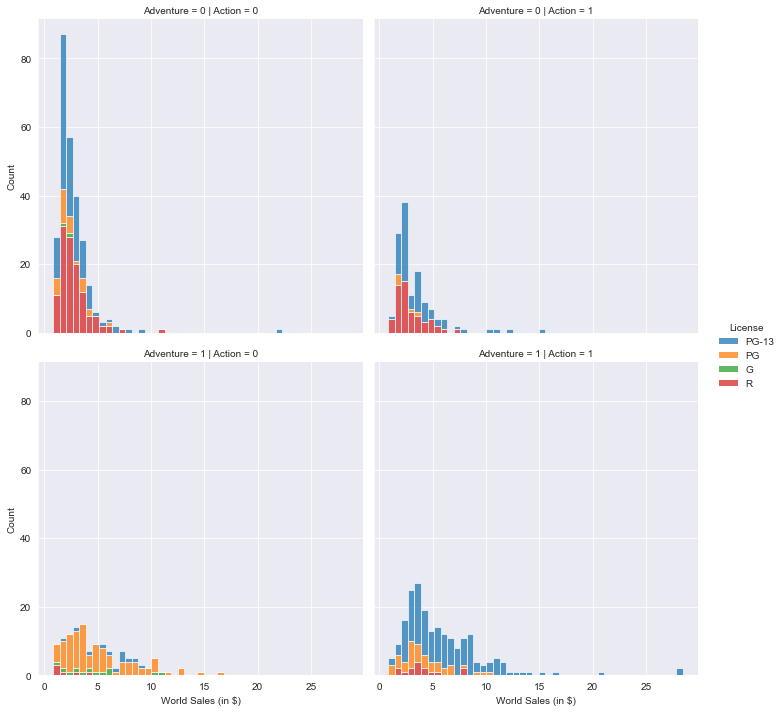

In [81]:
sns.displot(data=df, x='World Sales (in $)', hue='License', col='Action', 
            height=5, aspect=1, multiple="stack", row='Adventure')

In [84]:
# df['Title'].apply(lambda titulo: titulo.split('(')[1].split(')')[0])

In [101]:
df['Year Of Release'] = df['Title'].apply(lambda titulo: re.search(r'\((.*?)\)', titulo).group(1))

In [ ]:
df['Release Date'].fillna(value=df['Title'].apply(lambda titulo: re.search(r'\((.*?)\)', titulo).group(1)), inplace=True)

In [109]:
df.drop('Release Date', axis=1, inplace=True)

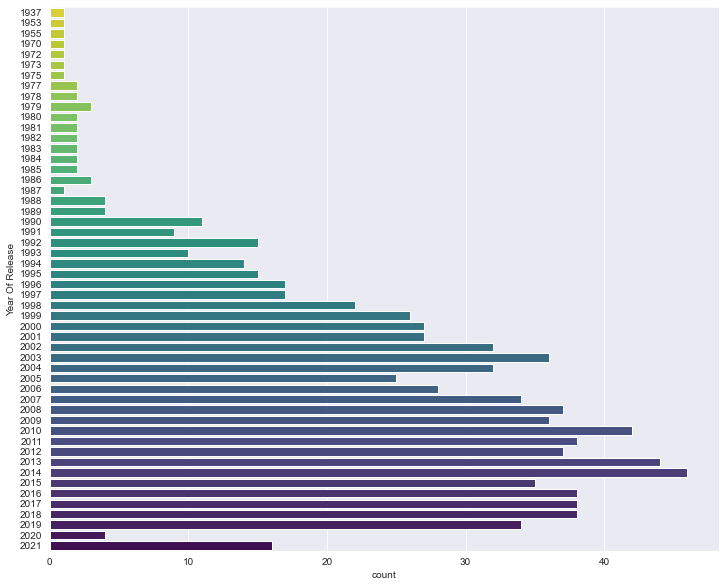

In [119]:
plt.figure(figsize=(12,10))
sns.countplot(data=df.sort_values(by='Year Of Release'), y='Year Of Release', palette='viridis_r');